In [1]:
from netCDF4  import Dataset
import numpy as np
import matplotlib.pyplot as plt
import copy

import figure_setups as fs

In [2]:
datadir         = 'project04/data/processed_data/'
glob_sst_hist   = (datadir + 'cmip6_historical_annual_mean_spg_tos.nc')
glob_sst_ssp126 = (datadir + 'cmip6_ssp126_annual_mean_spg_tos.nc')
glob_sst_ssp245 = (datadir + 'cmip6_ssp245_annual_mean_spg_tos.nc')
glob_sst_ssp585 = (datadir + 'cmip6_ssp585_annual_mean_spg_tos.nc')
ref_inds = np.arange(131,161) # 1981-2010

In [3]:
ncid        = Dataset(glob_sst_hist,'r')
Models_hist = list(ncid.variables.keys())[1:]
years_hist  = ncid.variables['year'][:]

# Hack...  need to tidy:
Models_histr = copy.deepcopy(Models_hist)
Models_histr[3] = 'CanESM5_r1i1p1f1'

nv_hist = len(Models_hist)
gSST_hist  = np.zeros((nv_hist,len(years_hist)),'float')
gSSTr_hist = np.zeros((nv_hist,len(years_hist)),'float')
for vv in range(0,nv_hist):
    gSST_hist[vv,:] = ncid.variables[Models_hist[vv]][:]
    vr = Models_hist.index(Models_hist[vv])
    gSSTr_hist[vv,:] = gSST_hist[vv,:]-np.mean(gSST_hist[vr,ref_inds])
ncid.close()

In [4]:
ncid        = Dataset(glob_sst_ssp126,'r')
Models_ssp126 = list(ncid.variables.keys())[1:]
years_ssp126  = ncid.variables['year'][:]


nv_ssp126 = len(Models_ssp126)
gSST_ssp126  = np.zeros((nv_ssp126,len(years_ssp126)),'float')
gSSTr_ssp126 = np.zeros((nv_ssp126,len(years_ssp126)),'float')
for vv in range(0,nv_ssp126):
    gSST_ssp126[vv,:] = ncid.variables[Models_ssp126[vv]][:]
    vr = Models_histr.index(Models_ssp126[vv])
    gSSTr_ssp126[vv,:] = gSST_ssp126[vv,:]-np.mean(gSST_hist[vr,ref_inds])
ncid.close()

In [5]:
ncid        = Dataset(glob_sst_ssp245,'r')
Models_ssp245 = list(ncid.variables.keys())[1:]
years_ssp245  = ncid.variables['year'][:]


nv_ssp245 = len(Models_ssp245)
gSST_ssp245  = np.zeros((nv_ssp245,len(years_ssp245)),'float')
gSSTr_ssp245 = np.zeros((nv_ssp245,len(years_ssp245)),'float')
for vv in range(0,nv_ssp245):
    gSST_ssp245[vv,:] = ncid.variables[Models_ssp245[vv]][:]
    vr = Models_histr.index(Models_ssp245[vv])
    gSSTr_ssp245[vv,:] = gSST_ssp245[vv,:]-np.mean(gSST_hist[vr,ref_inds])
ncid.close()

In [6]:
ncid        = Dataset(glob_sst_ssp585,'r')
Models_ssp585 = list(ncid.variables.keys())[1:]
years_ssp585  = ncid.variables['year'][:]


nv_ssp585 = len(Models_ssp585)
gSST_ssp585  = np.zeros((nv_ssp585,len(years_ssp585)),'float')
gSSTr_ssp585 = np.zeros((nv_ssp585,len(years_ssp585)),'float')
for vv in range(0,nv_ssp585):
    gSST_ssp585[vv,:] = ncid.variables[Models_ssp585[vv]][:]
    vr = Models_histr.index(Models_ssp585[vv])
    gSSTr_ssp585[vv,:] = gSST_ssp585[vv,:]-np.mean(gSST_hist[vr,ref_inds])
ncid.close() # spg = 40-60N, 50W-10E

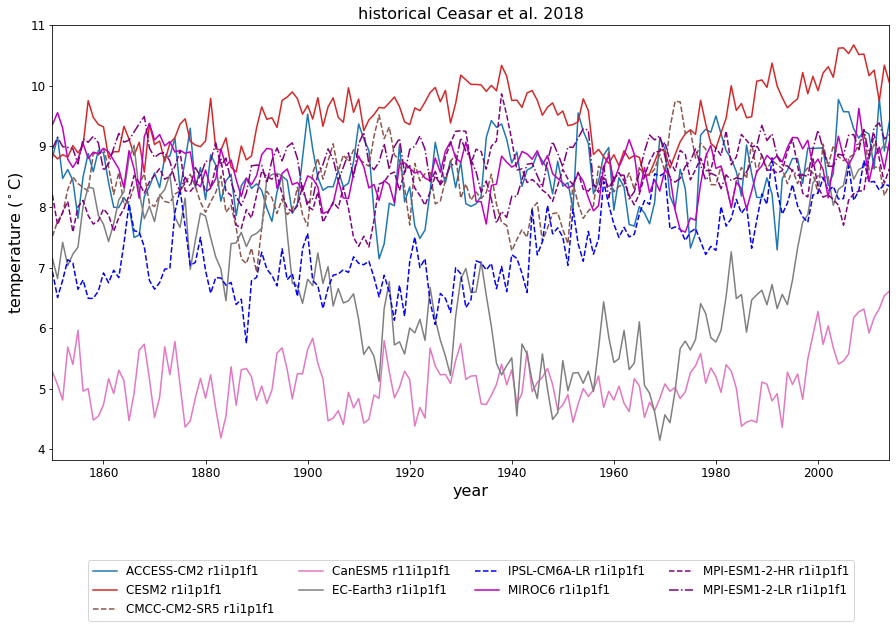

In [7]:
# Plot global mean temperature indices:

fig = plt.figure(figsize=(15,8))
for vv in range(0,nv_hist):
    Model = Models_hist[vv].split('_')[0]
    ENS   = Models_hist[vv].split('_')[1]
    plt.plot(years_hist,gSST_hist[vv,:],label=(Model + ' ' + ENS),color=fs.colors[Model],linestyle=fs.linestyle[Model])
    
plt.title('historical Ceasar et al. 2018',fontsize=16)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^\circ$C)',fontsize=16)
plt.xlim([years_hist[0],years_hist[-1]])
plt.tick_params(labelsize=12)
lg = plt.legend(ncol=4,bbox_to_anchor=[0.5,-0.3],loc='center',fontsize=12)

fig.savefig(('figures/all_spg_SST_historical.png'),\
        dpi=100,bbox_inches='tight', pad_inches=0.1)#45S-0 70W-30E



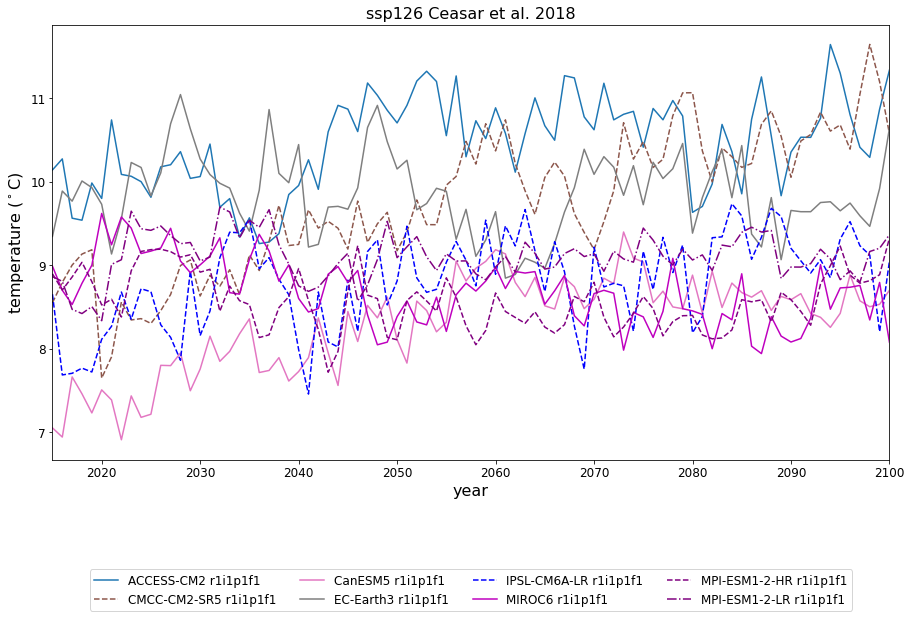

In [8]:
fig = plt.figure(figsize=(15,8))
for vv in range(0,nv_ssp126):
    Model = Models_ssp126[vv].split('_')[0]
    ENS   = Models_ssp126[vv].split('_')[1]
    plt.plot(years_ssp126,gSST_ssp126[vv,:],label=(Model + ' ' + ENS),color=fs.colors[Model],linestyle=fs.linestyle[Model])
    
plt.title('ssp126 Ceasar et al. 2018',fontsize=16)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^\circ$C)',fontsize=16)
plt.xlim([years_ssp126[0],years_ssp126[-1]])
plt.tick_params(labelsize=12)
lg = plt.legend(ncol=4,bbox_to_anchor=[0.5,-0.3],loc='center',fontsize=12)

fig.savefig(('figures/all_spg_SST_ssp126.png'),\
        dpi=100,bbox_inches='tight', pad_inches=0.1)

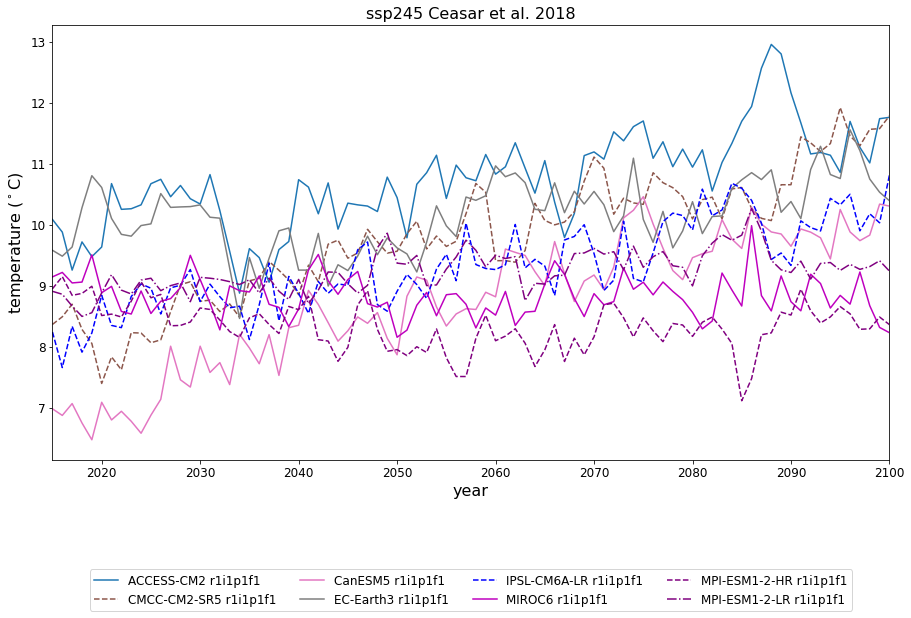

In [9]:
fig = plt.figure(figsize=(15,8))
for vv in range(0,nv_ssp245):
    Model = Models_ssp245[vv].split('_')[0]
    ENS   = Models_ssp245[vv].split('_')[1]
    plt.plot(years_ssp245,gSST_ssp245[vv,:],label=(Model + ' ' + ENS),color=fs.colors[Model],linestyle=fs.linestyle[Model])
    
plt.title('ssp245 Ceasar et al. 2018',fontsize=16)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^\circ$C)',fontsize=16)
plt.xlim([years_ssp245[0],years_ssp245[-1]])
plt.tick_params(labelsize=12)
lg = plt.legend(ncol=4,bbox_to_anchor=[0.5,-0.3],loc='center',fontsize=12)

fig.savefig(('figures/all_spg_SST_ssp245.png'),\
        dpi=100,bbox_inches='tight', pad_inches=0.1)

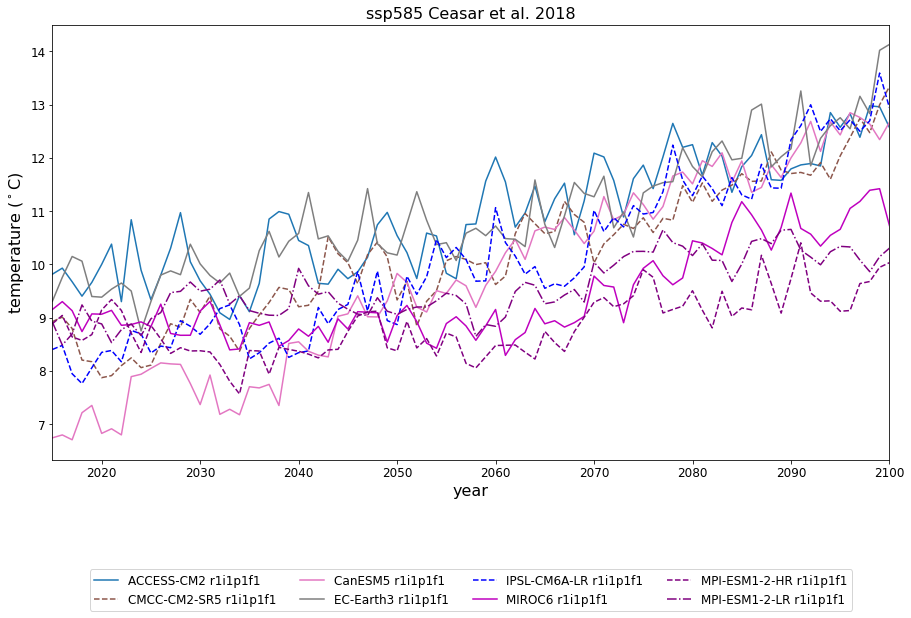

In [10]:
fig = plt.figure(figsize=(15,8))
for vv in range(0,nv_ssp585):
    Model = Models_ssp585[vv].split('_')[0]
    ENS   = Models_ssp585[vv].split('_')[1]
    plt.plot(years_ssp585,gSST_ssp585[vv,:],label=(Model + ' ' + ENS),color=fs.colors[Model],linestyle=fs.linestyle[Model])
    
plt.title('ssp585 Ceasar et al. 2018',fontsize=16)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^\circ$C)',fontsize=16)
plt.xlim([years_ssp585[0],years_ssp585[-1]])
plt.tick_params(labelsize=12)
lg = plt.legend(ncol=4,bbox_to_anchor=[0.5,-0.3],loc='center',fontsize=12)

fig.savefig(('figures/all_spg_SST_ssp585.png'),\
        dpi=100,bbox_inches='tight', pad_inches=0.1)

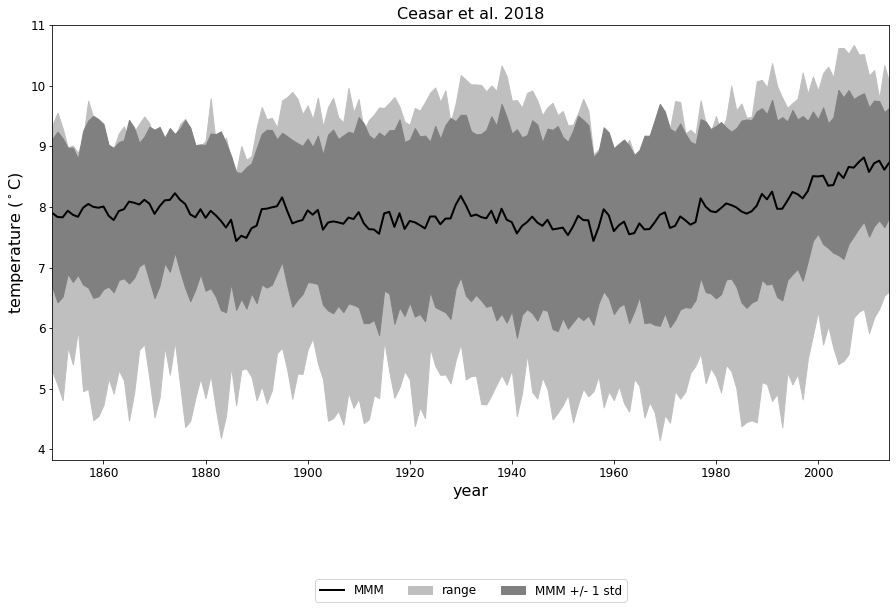

In [11]:
# Plot global mean temperature indices:

fig = plt.figure(figsize=(15,8))
plt.fill_between(years_hist, np.min(gSST_hist,axis=0), np.max(gSST_hist,axis=0), color='0.75',label='range')
plt.fill_between(years_hist, np.mean(gSST_hist,axis=0)-np.std(gSST_hist,axis=0), np.mean(gSST_hist,axis=0)+np.std(gSST_hist,axis=0), color='0.5',label='MMM +/- 1 std')
plt.plot(years_hist,np.mean(gSST_hist,axis=0),color='k',linewidth=2,label='MMM')
    
plt.title('Ceasar et al. 2018',fontsize=16)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^\circ$C)',fontsize=16)
plt.xlim([years_hist[0],years_hist[-1]])
plt.tick_params(labelsize=12)
lg = plt.legend(ncol=5,bbox_to_anchor=[0.5,-0.3],loc='center',fontsize=12)

fig.savefig(('figures/mmm_spg_SST_historical.png'),\
        dpi=100,bbox_inches='tight', pad_inches=0.1)

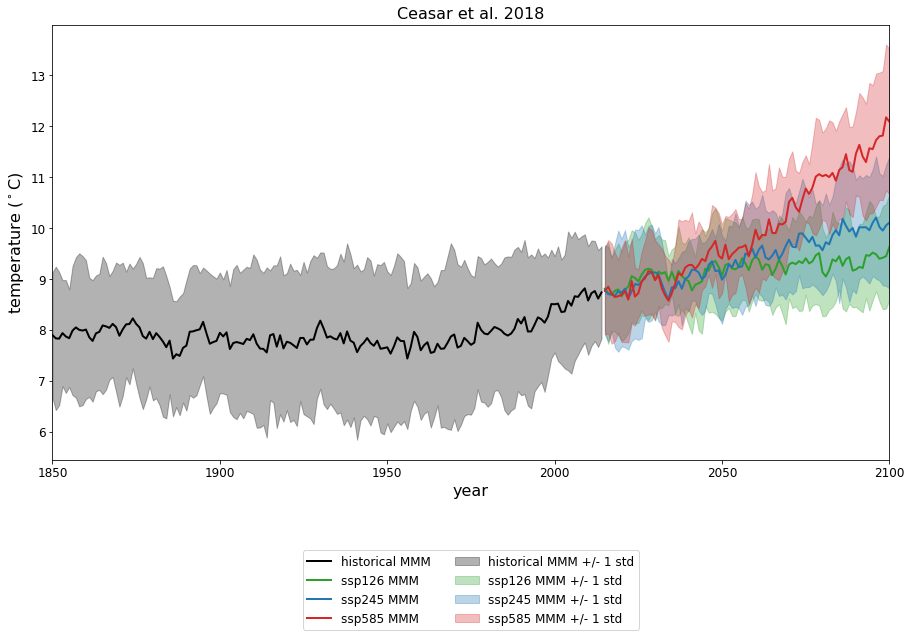

In [12]:
# Plot global mean temperature indices:

fig = plt.figure(figsize=(15,8))
#plt.fill_between(years_hist, np.min(gSST_hist,axis=0), np.max(gSST_hist,axis=0), color='k',label='historical range',alpha=0.2)
plt.fill_between(years_hist, np.mean(gSST_hist,axis=0)-np.std(gSST_hist,axis=0), np.mean(gSST_hist,axis=0)+np.std(gSST_hist,axis=0), color='k',label='historical MMM +/- 1 std',alpha=0.3)
plt.plot(years_hist,np.mean(gSST_hist,axis=0),color='k',linewidth=2,label='historical MMM')

#plt.fill_between(years_ssp126, np.min(gSST_ssp126,axis=0), np.max(gSST_ssp126,axis=0), color='C2',label='ssp126 range',alpha=0.2)
plt.fill_between(years_ssp126, np.mean(gSST_ssp126,axis=0)-np.std(gSST_ssp126,axis=0), np.mean(gSST_ssp126,axis=0)+np.std(gSST_ssp126,axis=0), color='C2',label='ssp126 MMM +/- 1 std',alpha=0.3)
plt.plot(years_ssp126,np.mean(gSST_ssp126,axis=0),color='C2',linewidth=2,label='ssp126 MMM')
    
#plt.fill_between(years_ssp245, np.min(gSST_ssp245,axis=0), np.max(gSST_ssp245,axis=0), color='C0',label='ssp245 range',alpha=0.2)
plt.fill_between(years_ssp245, np.mean(gSST_ssp245,axis=0)-np.std(gSST_ssp245,axis=0), np.mean(gSST_ssp245,axis=0)+np.std(gSST_ssp245,axis=0), color='C0',label='ssp245 MMM +/- 1 std',alpha=0.3)
plt.plot(years_ssp245,np.mean(gSST_ssp245,axis=0),color='C0',linewidth=2,label='ssp245 MMM')

#plt.fill_between(years_ssp585, np.min(gSST_ssp585,axis=0), np.max(gSST_ssp585,axis=0), color='C3',label='ssp585 range',alpha=0.2)
plt.fill_between(years_ssp585, np.mean(gSST_ssp585,axis=0)-np.std(gSST_ssp585,axis=0), np.mean(gSST_ssp585,axis=0)+np.std(gSST_ssp585,axis=0), color='C3',label='ssp585 MMM +/- 1 std',alpha=0.3)
plt.plot(years_ssp585,np.mean(gSST_ssp585,axis=0),color='C3',linewidth=2,label='ssp585 MMM')
  
plt.title('Ceasar et al. 2018',fontsize=16)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^\circ$C)',fontsize=16)
plt.xlim([years_hist[0],years_ssp585[-1]])
plt.tick_params(labelsize=12)
lg = plt.legend(ncol=2,bbox_to_anchor=[0.5,-0.3],loc='center',fontsize=12)

fig.savefig(('figures/mmm_spg_SST_all.png'),\
        dpi=100,bbox_inches='tight', pad_inches=0.1)

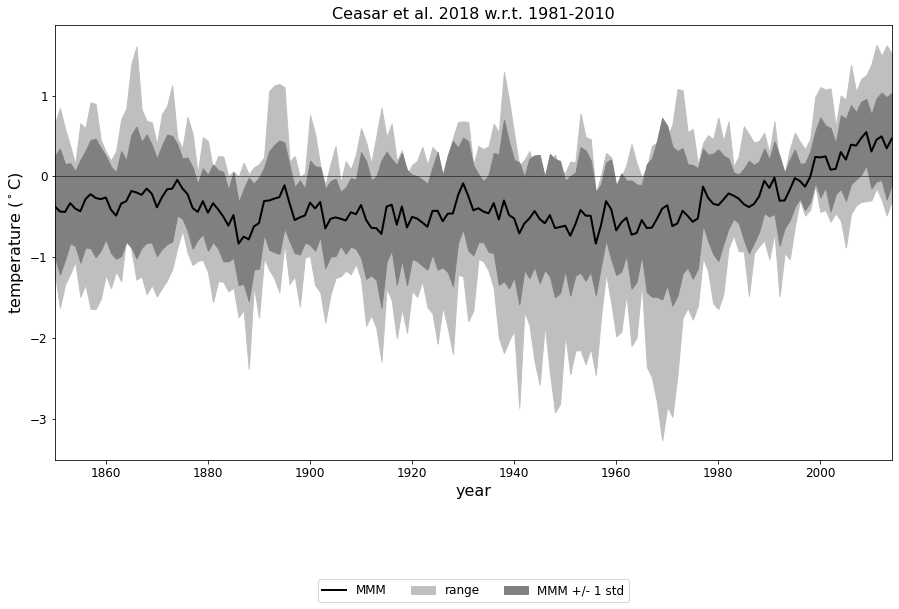

In [13]:
# Plot global mean temperature indices w.r.t. 1981-2010:

gSSTr_hist = gSST_hist - np.tile(np.mean(gSST_hist[:,131:161],axis=1),(165,1)).T

fig = plt.figure(figsize=(15,8))
plt.fill_between(years_hist, np.min(gSSTr_hist,axis=0), np.max(gSSTr_hist,axis=0), color='0.75',label='range')
plt.fill_between(years_hist, np.mean(gSSTr_hist,axis=0)-np.std(gSSTr_hist,axis=0), np.mean(gSSTr_hist,axis=0)+np.std(gSSTr_hist,axis=0), color='0.5',label='MMM +/- 1 std')
plt.plot(years_hist,np.mean(gSSTr_hist,axis=0),color='k',linewidth=2,label='MMM')
    
plt.title(('Ceasar et al. 2018 w.r.t. 1981-2010'),fontsize=16)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^\circ$C)',fontsize=16)
plt.xlim([years_hist[0],years_hist[-1]])
plt.tick_params(labelsize=12)
plt.axhline(y=0,lw=0.5,color='k')
lg = plt.legend(ncol=5,bbox_to_anchor=[0.5,-0.3],loc='center',fontsize=12)

fig.savefig(('figures/mmm_wrt1981_2010_spg_SST_historical.png'),\
        dpi=100,bbox_inches='tight', pad_inches=0.1)

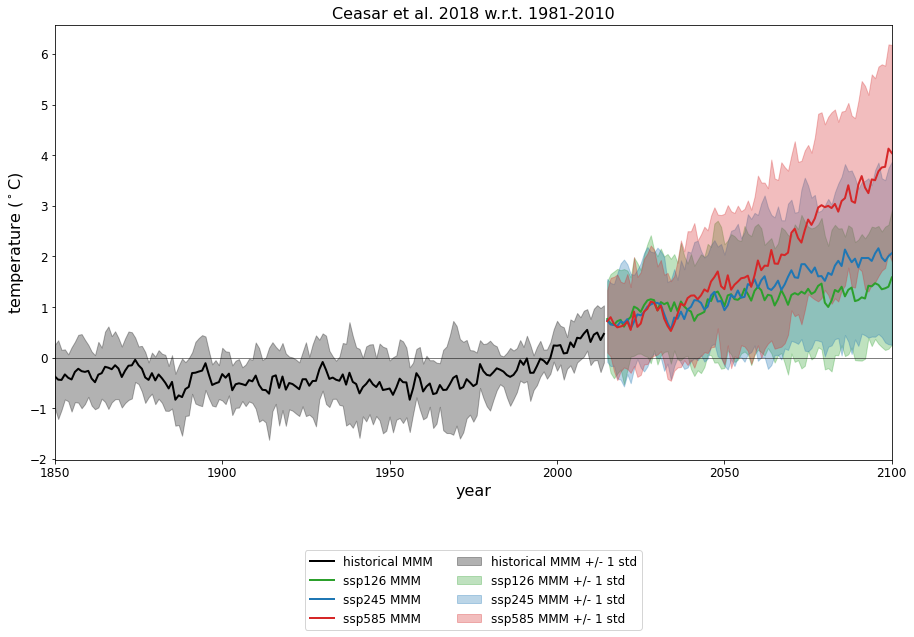

In [14]:
# Plot global mean temperature indices w.r.t. 1981-2010:

fig = plt.figure(figsize=(15,8))
#plt.fill_between(years_hist, np.min(gSSTr_hist,axis=0), np.max(gSSTr_hist,axis=0), color='k',label='historical range',alpha=0.3)
plt.fill_between(years_hist, np.mean(gSSTr_hist,axis=0)-np.std(gSSTr_hist,axis=0), np.mean(gSSTr_hist,axis=0)+np.std(gSSTr_hist,axis=0), color='k',label='historical MMM +/- 1 std',alpha=0.3)
plt.plot(years_hist,np.mean(gSSTr_hist,axis=0),color='k',linewidth=2,label='historical MMM')

#plt.fill_between(years_ssp126, np.min(gSSTr_ssp126,axis=0), np.max(gSSTr_ssp126,axis=0), color='C2',label='ssp126 range',alpha=0.3)
plt.fill_between(years_ssp126, np.mean(gSSTr_ssp126,axis=0)-np.std(gSSTr_ssp126,axis=0), np.mean(gSSTr_ssp126,axis=0)+np.std(gSSTr_ssp126,axis=0), color='C2',label='ssp126 MMM +/- 1 std',alpha=0.3)
plt.plot(years_ssp126,np.mean(gSSTr_ssp126,axis=0),color='C2',linewidth=2,label='ssp126 MMM')

#plt.fill_between(years_ssp245, np.min(gSSTr_ssp245,axis=0), np.max(gSSTr_ssp245,axis=0), color='C0',label='ssp245 range',alpha=0.3)
plt.fill_between(years_ssp245, np.mean(gSSTr_ssp245,axis=0)-np.std(gSSTr_ssp245,axis=0), np.mean(gSSTr_ssp245,axis=0)+np.std(gSSTr_ssp245,axis=0), color='C0',label='ssp245 MMM +/- 1 std',alpha=0.3)
plt.plot(years_ssp245,np.mean(gSSTr_ssp245,axis=0),color='C0',linewidth=2,label='ssp245 MMM')

#plt.fill_between(years_ssp585, np.min(gSSTr_ssp585,axis=0), np.max(gSSTr_ssp585,axis=0), color='C3',label='ssp585 range',alpha=0.3)
plt.fill_between(years_ssp585, np.mean(gSSTr_ssp585,axis=0)-np.std(gSSTr_ssp585,axis=0), np.mean(gSSTr_ssp585,axis=0)+np.std(gSSTr_ssp585,axis=0), color='C3',label='ssp585 MMM +/- 1 std',alpha=0.3)
plt.plot(years_ssp585,np.mean(gSSTr_ssp585,axis=0),color='C3',linewidth=2,label='ssp585 MMM')
    
plt.title('Ceasar et al. 2018 w.r.t. 1981-2010',fontsize=16)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^\circ$C)',fontsize=16)
plt.xlim([years_hist[0],years_ssp585[-1]])
plt.tick_params(labelsize=12)
plt.axhline(y=0,lw=0.5,color='k')
lg = plt.legend(ncol=2,bbox_to_anchor=[0.5,-0.3],loc='center',fontsize=12)

fig.savefig(('figures/mmm_wrt1981_2010_spg_SST_all.png'),\
        dpi=100,bbox_inches='tight', pad_inches=0.1)